In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

In [2]:
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
NASDAQ = "Data/Stocks/nasdaq200/"
NIFTY = "Data/Stocks/nifty200/"
INDICES = "Data/Indices"

In [17]:
apple = pd.read_csv(f"{NASDAQ}/AAPL.csv")
apple["Date"] = pd.to_datetime(apple["Date"])
apple.set_index("Date", inplace=True)
apple.head()

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12 00:00:00-05:00,0.099874,0.100308,0.099874,0.099874,469033600
1980-12-15 00:00:00-05:00,0.095098,0.095098,0.094663,0.094663,175884800
1980-12-16 00:00:00-05:00,0.088149,0.088149,0.087715,0.087715,105728000
1980-12-17 00:00:00-05:00,0.089886,0.090320,0.089886,0.089886,86441600
1980-12-18 00:00:00-05:00,0.092492,0.092927,0.092492,0.092492,73449600


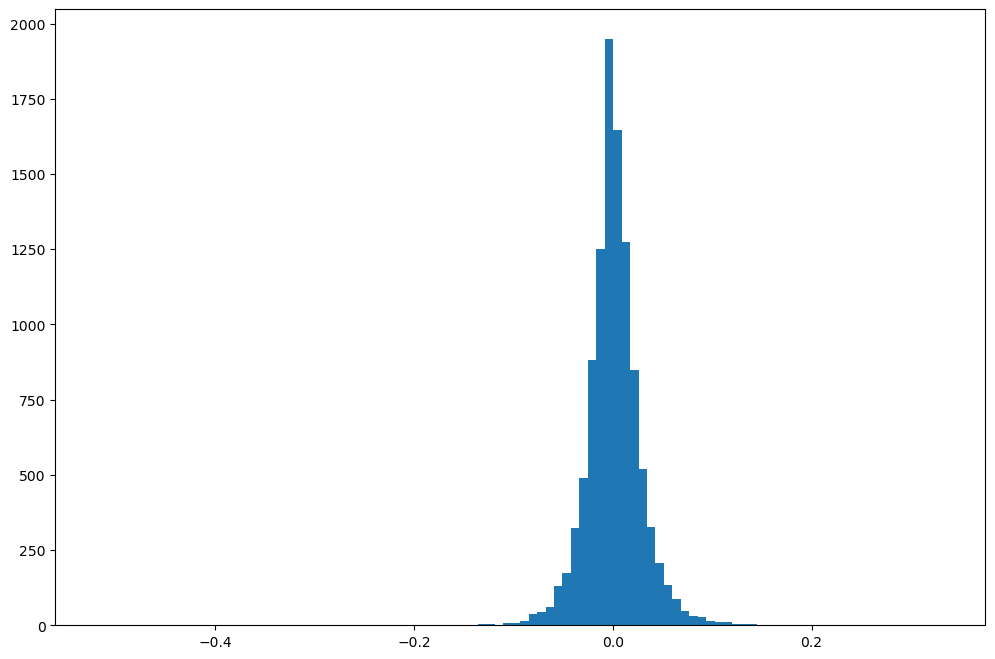

In [21]:
return_apple = apple["Close"].pct_change()
return_apple = return_apple.dropna()

plt.hist(return_apple, bins=100);

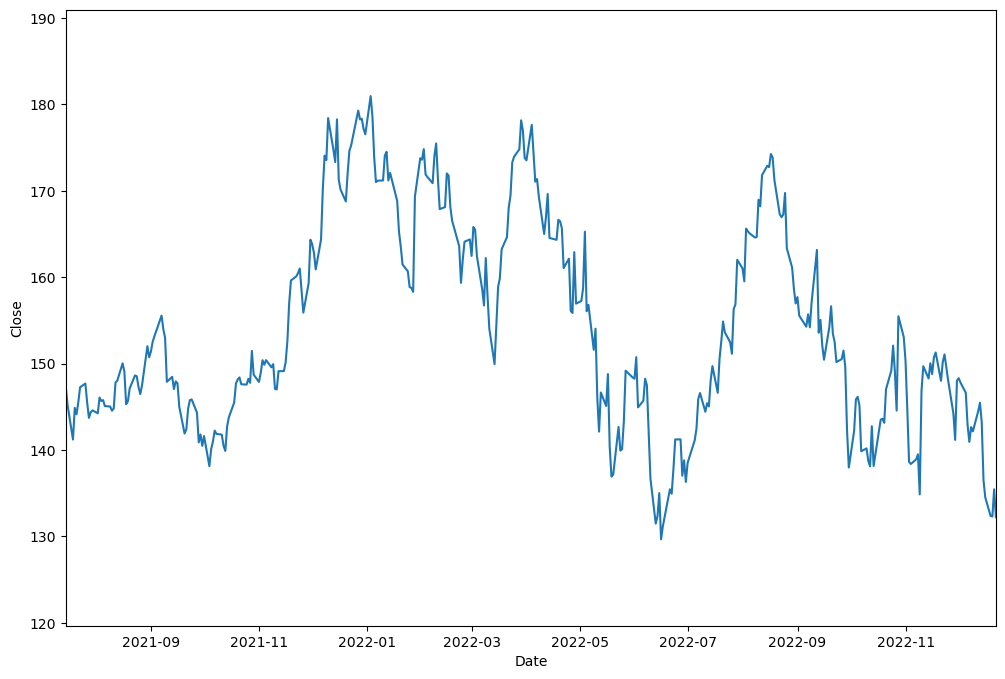

In [18]:
sns.lineplot(data=apple, y="Close", x=apple.index)
#limit data to last one year
plt.xlim(apple.index[-365], apple.index[-1])
plt.ylim(apple.Close[-365:].min()-10, apple.Close[-365:].max()+10);

In [19]:
def return_with_freq(data, freq):
    """
    Plots a line plot of the returns of the data with the mean, mean+std, mean-std and zero line

    Parameters
    ----------
    data : pandas.DataFrame
        The data to be plotted
    freq : str
        The frequency of the data
        Can be "M" for freqly, "W" for weekly and "Y" for yearly or "D" for daily

    Returns
    -------
    None
    """
    frequency = {"M": "Monthly", "W": "Weekly", "Y": "Yearly", "D": "Daily"}
    data_freq = data.asfreq(freq, method="ffill")
    freqly_pc = data_freq["Close"].pct_change()*100
    freqly_pc = freqly_pc.dropna()
    freqly_pc.plot()
    plt.axhline(freqly_pc.mean(), color="green", linestyle="--")
    plt.axhline(freqly_pc.mean()+freqly_pc.std(), color="red", linestyle="--")
    plt.axhline(freqly_pc.mean()-freqly_pc.std(), color="red", linestyle="--")
    plt.axhline(0, color="black", linestyle="--")
    plt.legend([f"{frequency[freq]} Return", "Mean", "Mean+Std", "Mean-Std", "Zero Line"])
    plt.show()

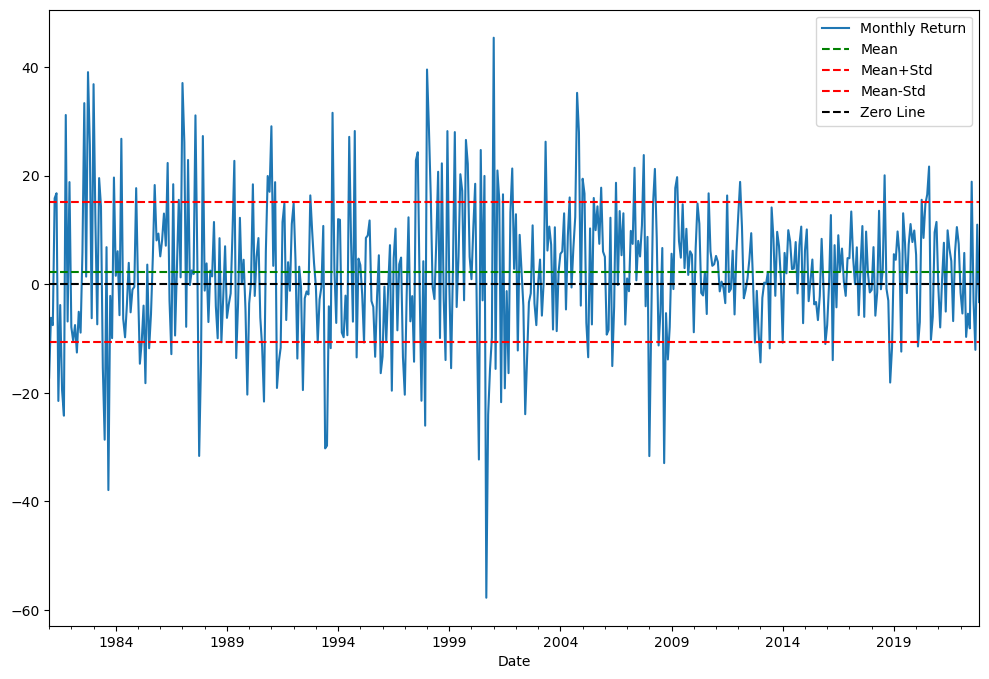

In [20]:
return_with_freq(apple, "M")

In [77]:
# resample end of month and forward fill
apple_month = apple.asfreq("M", method="ffill")

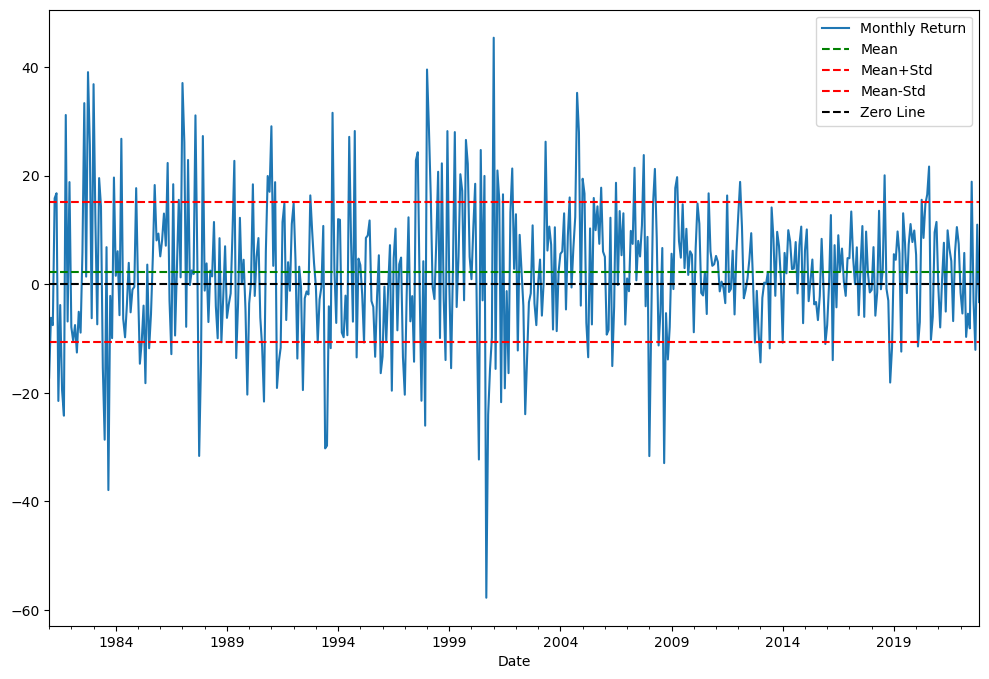

In [89]:
apple_month = apple.asfreq("M", method="ffill")
monthly_pc = apple_month["Close"].pct_change()*100
monthly_pc = monthly_pc.dropna()
monthly_pc.plot()
plt.axhline(monthly_pc.mean(), color="green", linestyle="--")
plt.axhline(monthly_pc.mean()+monthly_pc.std(), color="red", linestyle="--")
plt.axhline(monthly_pc.mean()-monthly_pc.std(), color="red", linestyle="--");
plt.axhline(0, color="black", linestyle="--")
plt.legend(["Monthly Return", "Mean", "Mean+Std", "Mean-Std", "Zero Line"]);

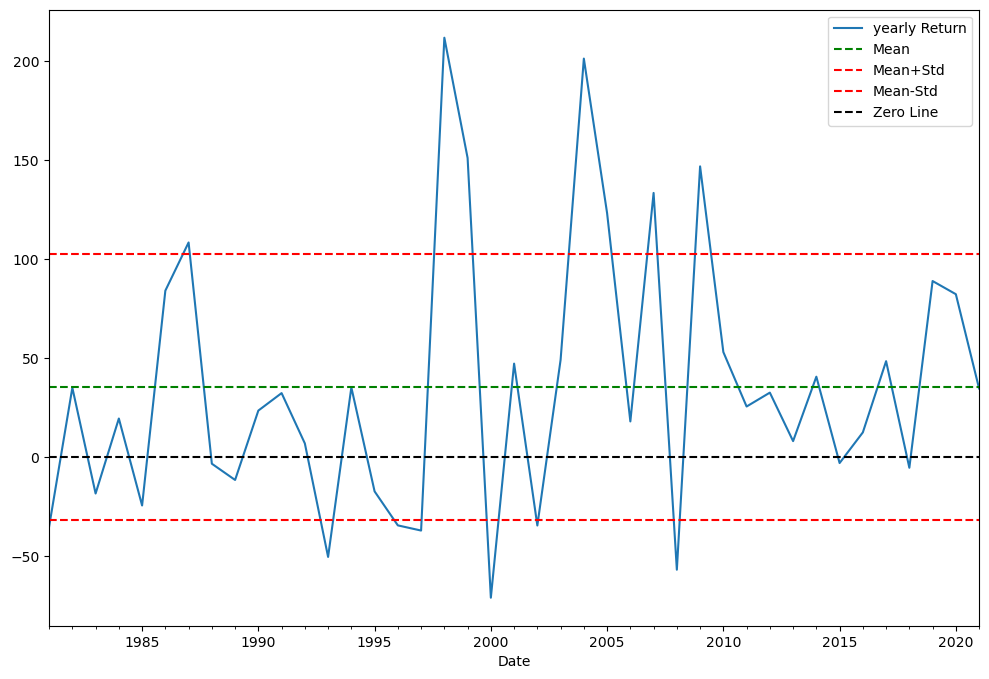

In [90]:
apple_year = apple.asfreq("Y", method="ffill")
yearly_pc = apple_year["Close"].pct_change()*100
yearly_pc = yearly_pc.dropna()
yearly_pc.plot()
plt.axhline(yearly_pc.mean(), color="green", linestyle="--")
plt.axhline(yearly_pc.mean()+yearly_pc.std(), color="red", linestyle="--")
plt.axhline(yearly_pc.mean()-yearly_pc.std(), color="red", linestyle="--");
plt.axhline(0, color="black", linestyle="--")
plt.legend(["yearly Return", "Mean", "Mean+Std", "Mean-Std", "Zero Line"]);

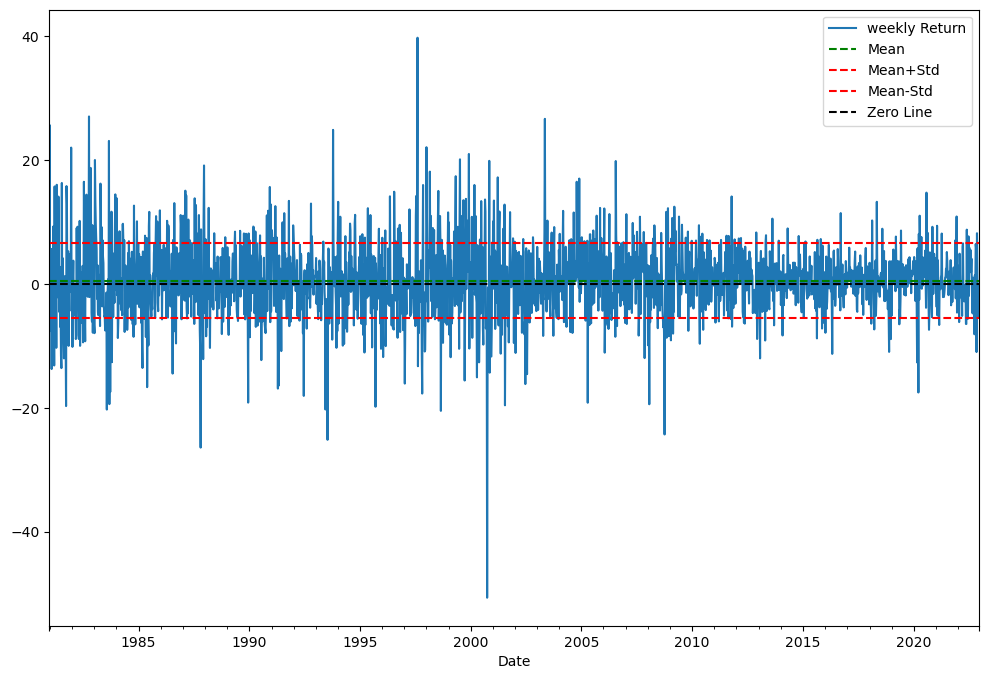

In [91]:
apple_week = apple.asfreq("W", method="ffill")
weekly_pc = apple_week["Close"].pct_change()*100
weekly_pc = weekly_pc.dropna()
weekly_pc.plot()
plt.axhline(weekly_pc.mean(), color="green", linestyle="--")
plt.axhline(weekly_pc.mean()+weekly_pc.std(), color="red", linestyle="--")
plt.axhline(weekly_pc.mean()-weekly_pc.std(), color="red", linestyle="--");
plt.axhline(0, color="black", linestyle="--")
plt.legend(["weekly Return", "Mean", "Mean+Std", "Mean-Std", "Zero Line"]);

In [6]:
def return_with_freq(data, freq):
    """
    Plots a line plot of the returns of the data with the mean, mean+std, mean-std and zero line

    Parameters
    ----------
    data : pandas.DataFrame
        The data to be plotted
    freq : str
        The frequency of the data
        Can be "M" for freqly, "W" for weekly and "Y" for yearly or "D" for daily

    Returns
    -------
    None
    """
    frequency = {"M": "Monthly", "W": "Weekly", "Y": "Yearly", "D": "Daily"}
    data_freq = data.asfreq(freq, method="ffill")
    freqly_pc = data_freq["Close"].pct_change()*100
    freqly_pc = freqly_pc.dropna()
    freqly_pc.plot()
    plt.axhline(freqly_pc.mean(), color="green", linestyle="--")
    plt.axhline(freqly_pc.mean()+freqly_pc.std(), color="red", linestyle="--")
    plt.axhline(freqly_pc.mean()-freqly_pc.std(), color="red", linestyle="--")
    plt.axhline(0, color="black", linestyle="--")
    plt.legend([f"{frequency[freq]} Return", "Mean", "Mean+Std", "Mean-Std", "Zero Line"])
    plt.show()

In [8]:
apple

,Date,Open,High,Low,Close,Volume
0,1980-12-12 00:00:00-05:00,0.099874,0.100308,0.099874,0.099874,469033600
1,1980-12-15 00:00:00-05:00,0.095098,0.095098,0.094663,0.094663,175884800
2,1980-12-16 00:00:00-05:00,0.088149,0.088149,0.087715,0.087715,105728000
3,1980-12-17 00:00:00-05:00,0.089886,0.090320,0.089886,0.089886,86441600
4,1980-12-18 00:00:00-05:00,0.092492,0.092927,0.092492,0.092492,73449600
...,...,...,...,...,...,...
10593,2022-12-16 00:00:00-05:00,136.690002,137.649994,133.729996,134.509995,160080100
10594,2022-12-19 00:00:00-05:00,135.110001,135.199997,131.320007,132.369995,79592600
10595,2022-12-20 00:00:00-05:00,131.389999,133.250000,129.889999,132.300003,77432800
10596,2022-12-21 00:00:00-05:00,132.979996,136.809998,132.750000,135.449997,85928000


In [37]:
def candle_plot(data, past_days, stock_name="Stock"):
    """
    Creates a candlestick plot of the data for the past past_days

    Parameters
    ----------
    data : pandas.DataFrame
        The data to be plotted
    past_days : int
        The number of days to be plotted

    Returns
    -------
    None
    """
    if past_days>len(data):
        raise ValueError("past_days cannot be greater than the length of the data")
    data_past_days = apple[-past_days*1:]
    # Convert the index to datetime
    data_past_days.index = pd.to_datetime(data_past_days.index, utc=True)

    # Create a new dataframe with only the 'Date', 'Open', 'High', 'Low', 'Close' columns
    data = data_past_days[['Open', 'High', 'Low', 'Close']]
    data.reset_index(inplace=True)

    # Convert the 'Date' column to float values
    data['Date'] = data['Date'].map(mdates.date2num)

    # Plot the candlestick chart
    ax = plt.subplot()
    ax.grid(True)
    ax.set_axisbelow(True)
    ax.set_title(f'{stock_name} Price', color='#010203')
    ax.set_facecolor('#f2f6fc')
    ax.figure.set_facecolor('#f2f6fc')
    ax.tick_params(axis='x', colors='#010203')
    ax.tick_params(axis='y', colors='#010203')
    ax.xaxis_date()

    candlestick_ohlc(ax, data.values, width=0.6, colorup='#00ff00')

    plt.show()

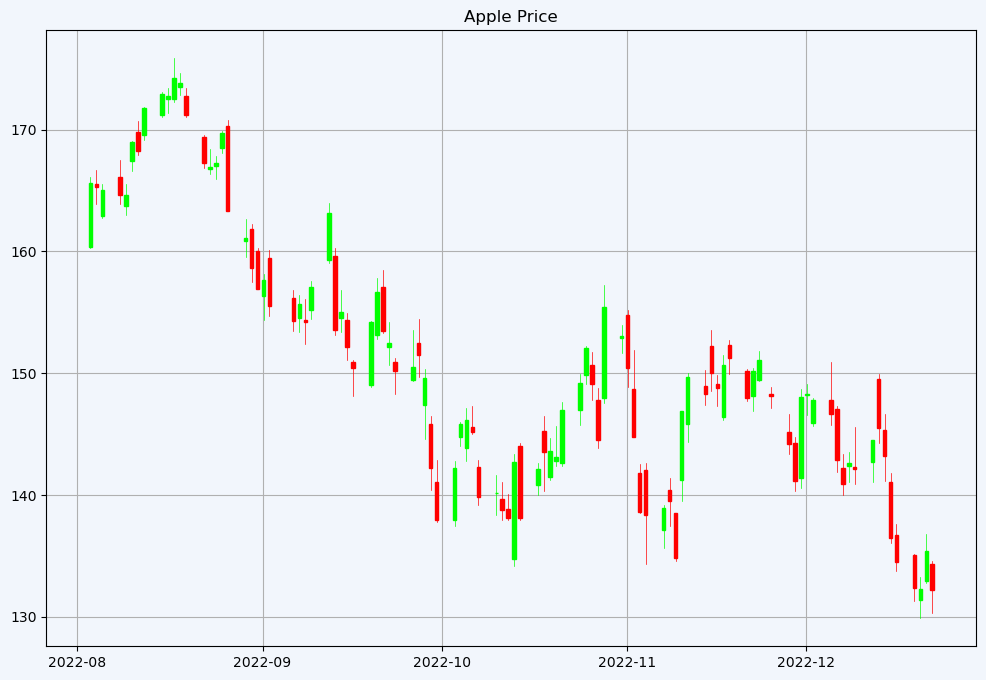

In [38]:
candle_plot(apple, 100, "Apple")

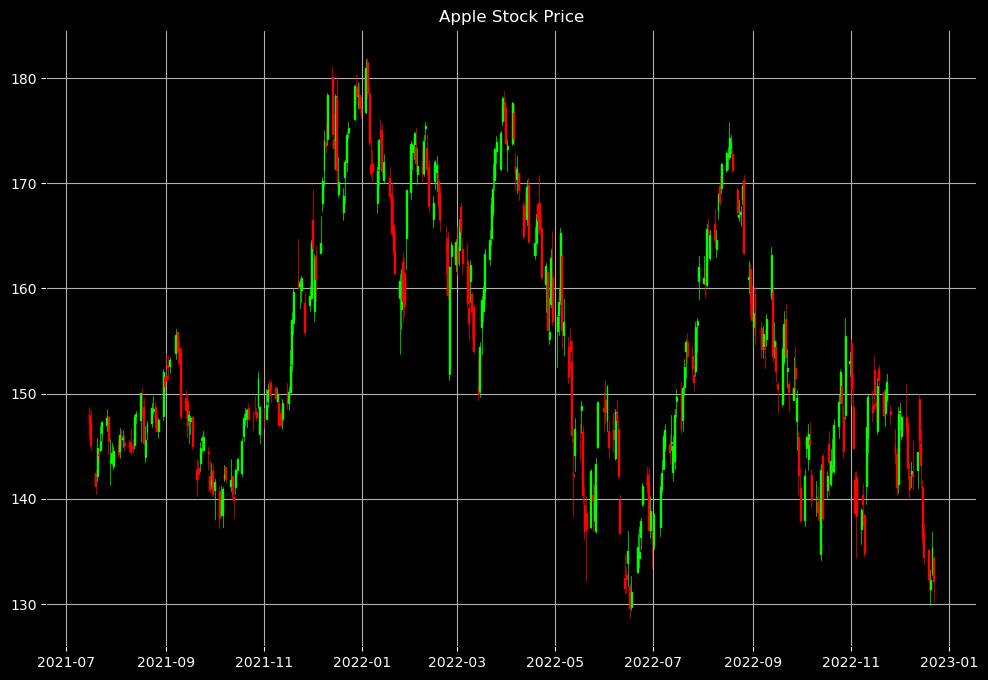

In [105]:
# Plot the candlestick chart
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
apple_lat_two_years = apple[-365*1:]
# Convert the index to datetime
apple_lat_two_years.index = pd.to_datetime(apple_lat_two_years.index, utc=True)

# Create a new dataframe with only the 'Date', 'Open', 'High', 'Low', 'Close' columns
data = apple_lat_two_years[['Open', 'High', 'Low', 'Close']]
data.reset_index(inplace=True)

# Convert the 'Date' column to float values
data['Date'] = data['Date'].map(mdates.date2num)

# Plot the candlestick chart
ax = plt.subplot()
ax.grid(True)
ax.set_axisbelow(True)
ax.set_title('Apple Stock Price', color='white')
ax.set_facecolor('black')
ax.figure.set_facecolor('#000000')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.xaxis_date()

candlestick_ohlc(ax, data.values, width=0.6, colorup='#00ff00')

plt.show()